In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = '../data_raw/'
file_list = os.listdir(file_path)
output_path = '../comparing_categories/data/california_top_five_trees.csv'

In [5]:
df_append = pd.DataFrame()
for file in file_list:
            df_temp = pd.read_csv(file_path  + file, on_bad_lines='skip')
            df_temp['file_name'] = file.split('_')[0]
            df_append = df_append.append(df_temp, ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_145324\1941588964.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_145324\1941588964.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_145324\1941588964.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_145324\1941588964.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append

In [6]:
states = list(df_append['state'].unique())
for state in states:
    print(state)
    cities = list(df_append[df_append['state'] == state]['file_name'].unique())
    print(cities)
    print()

New Mexico
['Albuquerque']

nan
[]

California
['Anaheim', 'Fresno', 'GardenGrove', 'HuntingtonBeach', 'Irvine', 'Oakland', 'Ontario', 'RanchoCucamonga', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Stockton']

Texas
['Arlington', 'Austin', 'Dallas', 'Houston', 'Plano']

Georgia
['Atlanta']

Colorado
['AuroraCO', 'ColoradoSprings', 'Denver']

Maryland
['Baltimore']

Massachusetts
['Boston', 'Worcester']

New York
['Buffalo', 'Rochester']

Florida
['CapeCoral', 'Miami', 'Orlando', 'Tampa']

Ohio
['Columbus']

Iowa
['DesMoines']

Michigan
['Detroit', 'GrandRapids']

North Carolina
['Durham', 'Greensboro']

Hawaii
['Honolulu']

Indiana
['Indianapolis']

New Jersey
['Jerseycity']

Tennessee
['Knoxville', 'Nashville']

Nevada
['LasVegas']

Kentucky
['Louisville']

Wisconsin
['Madison', 'Milwaukee']

Minnesota
['Minneapolis']

Louisiana
['NewOrleans']

Oklahoma
['OklahomaCity']

Kansas
['OverlandPark']

Arizona
['Phoenix']

Pennsylvania
['Pittsburgh']

Oregon
['Portland

In [7]:
state_cities =['Albuquerque','Phoenix','Arlington', 'CapeCoral', 'Miami', 'Orlando', 'Tampa','Austin', 'Dallas', 'Houston', 'Plano','Anaheim', 'Fresno', 'GardenGrove', 'HuntingtonBeach', 'Irvine', 'LosAngeles', 'Oakland', 'Ontario', 'RanchoCucamonga', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Stockton']

In [8]:
number = []
for city in state_cities:
    #print(city)
    #print(len(df_append[df_append['file_name'] == city]))
    number.append(len(df_append[df_append['file_name'] == city]))

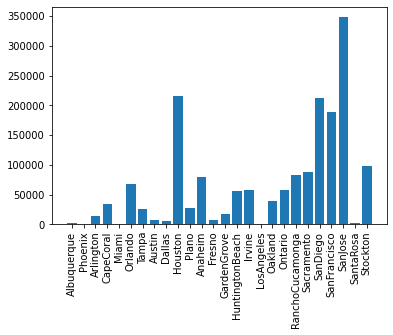

In [9]:
plt.bar(state_cities, height = number)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
g_cities = []
for i in range(len(number)):
    if (number[i] <80000) and (number[i] > 14000):
        g_cities.append(state_cities[i])
        
chosen_cities = g_cities
df = df_append[df_append['file_name'].isin(g_cities)]

In [11]:
list_spec = []
list_num = []
for i, city in enumerate(chosen_cities):
    list_spec.append(list(df[df['file_name']== city].groupby("scientific_name").count().sort_values('file_name',ascending=False)['file_name'].head(20).index))
    list_num.append(list(df_append[df_append['file_name']== city].groupby("scientific_name").count().sort_values(by='file_name', ascending=False)['file_name'].head(20)/len(df_append[df_append['file_name']== city])))

In [12]:
dict_trees = {}
for i in range(len(list_spec)):
    for j in range(20):
        if list_spec[i][j] in dict_trees:
            dict_trees[list_spec[i][j]] += list_num[i][j]
        else:
            dict_trees[list_spec[i][j]] = list_num[i][j]
            

In [13]:
d = sorted(dict_trees.items(), key=lambda x:x[1])
d_rel = d[::-1][:15]
chosen_trees = []
for i in range(len(d_rel)):
    chosen_trees.append(d_rel[i][0])

In [14]:
df_tree = df[df['scientific_name'].isin(chosen_trees)]

In [15]:
state_city_list = []
for city in g_cities:
    state = df_tree[df_tree['file_name'] == city]['state'].unique()[0]
    tree_n = len(df_tree[df_tree['file_name'] == city]['common_name'])
    state_city_list.append([state, city, int(tree_n)])

In [16]:
df_vis = pd.DataFrame(chosen_trees, columns = ['scientificName'])
df_vis = df_vis.set_index('scientificName')
df_vis.to_csv('example_sp.csv')

We used GPIF to get normilized.csv - taxonomy information of chosen trees

In [18]:
taxonomy = pd.read_csv('normalized.csv')
taxonomy

,occurrenceId,verbatimScientificName,scientificName,key,matchType,confidence,status,rank,kingdom,phylum,class,order,family,genus,species,canonicalName,authorship,usageKey,acceptedUsageKey
0,NaN,Lagerstroemia indica,Lagerstroemia indica L.,3188725,EXACT,100,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Myrtales,Lythraceae,Lagerstroemia,Lagerstroemia indica,Lagerstroemia indica,L.,3188725,NaN
1,NaN,Quercus virginiana,Quercus virginiana Mill.,2878092,EXACT,100,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus virginiana,Quercus virginiana,Mill.,2878092,NaN
2,NaN,Sabal palmetto,Sabal palmetto (Walter) Lodd. ex Schult. & Sch...,4925538,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Liliopsida,Arecales,Arecaceae,Sabal,Sabal palmetto,Sabal palmetto,(Walter) Lodd. ex Schult. & Schult.f.,4925538,NaN
3,NaN,Washingtonia robusta,Washingtonia robusta H.Wendl.,5294595,EXACT,100,ACCEPTED,SPECIES,Plantae,Tracheophyta,Liliopsida,Arecales,Arecaceae,Washingtonia,Washingtonia robusta,Washingtonia robusta,H.Wendl.,5294595,NaN
4,NaN,Pinus canariensis,Pinus canariensis C.Sm.,5285243,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Pinus,Pinus canariensis,Pinus canariensis,C.Sm.,5285243,NaN
5,NaN,Platanus acerifolia,Platanus ×acerifolia (Aiton) Willd.,3152815,EXACT,100,SYNONYM,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Proteales,Platanaceae,Platanus,Platanus hispanica,Platanus acerifolia,(Aiton) Willd.,3152815,7400250.0
6,NaN,Liquidambar styraciflua,Liquidambar styraciflua L.,3152824,EXACT,100,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Altingiaceae,Liquidambar,Liquidambar styraciflua,Liquidambar styraciflua,L.,3152824,NaN
7,NaN,Ulmus crassifolia,Ulmus crassifolia Nutt.,5361871,EXACT,100,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Rosales,Ulmaceae,Ulmus,Ulmus crassifolia,Ulmus crassifolia,Nutt.,5361871,NaN
8,NaN,Quercus laurifolia,Quercus laurifolia Michx.,2877708,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus laurifolia,Quercus laurifolia,Michx.,2877708,NaN
9,NaN,Pyrus calleryana,Pyrus calleryana Decne.,5363119,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rosaceae,Pyrus,Pyrus calleryana,Pyrus calleryana,Decne.,5363119,NaN


In [19]:
order = list(taxonomy['order'].unique())
class_ = list(taxonomy['class'].unique())

In [20]:
city_tree_list = []
for city in g_cities:
    for tree in chosen_trees:
        tree_n = len(df.loc[(df['file_name'] == city) & (df['scientific_name']== tree)]['file_name'])
        city_tree_list.append([city,tree, int(tree_n)])

In [23]:
tree_order_list = []
for one_order in order:
    species = list(taxonomy[taxonomy['order'] == one_order]['verbatimScientificName'].unique())
    for spec in species:
        val = len(df_tree[df_tree['scientific_name'] == spec]['file_name'])
        tree_order_list.append([spec, one_order, int(val)])
    
    
    

In [26]:
order_class_list = []
for one_class_ in class_:
    orders = list(taxonomy[taxonomy['class'] == one_class_]['order'].unique())
    
    for one_order in orders:
        species = list(taxonomy[taxonomy['order'] == one_order]['verbatimScientificName'].unique())
        val = len(df_tree[df_tree['scientific_name'].isin(species)]['file_name'])
        order_class_list.append([one_order,one_class_, int(val)])
    

In [28]:
result_list = state_city_list+ city_tree_list + tree_order_list + order_class_list
result_df = pd.DataFrame(result_list, columns = ['source', 'target','value'])
result_df.set_index(['source', 'target','value']).to_csv('../alluvial/data/alluvial_data.csv')